# 範例 : (Kaggle)房價預測精簡版 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques
***
- 以下是房價預測的精簡版範例
- 使用最小量的特徵工程以及線性回歸模型做預測, 最後輸出可以在Kaggle提交的預測檔

# [教學目標]
- 重點在於特徵工程的使用, 後續的課程當中會教導同學如何對這塊作調整

# [範例重點]
- 精簡後的特徵工程 - 包含補缺失值(fillna). 標籤編碼(LabelEncoder).  
最小最大化(MinMaxScaler) 如何使用在同一個程式區塊中 (In[3])   

In [44]:
# 載入基本套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 載入標籤編碼與最小最大化, 以便做最小的特徵工程
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 讀取訓練與測試資料
data_path = 'data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')
df_test = pd.read_csv(data_path + 'house_test.csv.gz')
print(df_train.shape)

(1460, 81)


In [45]:
# 訓練資料需要 train_X, train_Y / 預測輸出需要 ids(識別每個預測值), test_X
# 在此先抽離出 train_Y 與 ids, 而先將 train_X, test_X 該有的資料合併成 df, 先作特徵工程
train_Y = np.log1p(df_train['SalePrice'])
ids = df_test['Id']
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)
df_test = df_test.drop(['Id'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [46]:
# 特徵工程-簡化版 : 全部空值先補-1, 所有類別欄位先做 LabelEncoder, 然後再與數字欄位做 MinMaxScaler
# 這邊使用 LabelEncoder 只是先將類別欄位用統一方式轉成數值以便輸入模型, 當然部分欄位做 One-Hot可能會更好, 只是先使用最簡單版本作為範例
LEncoder = LabelEncoder()
# 除上述之外, 還要把標籤編碼與數值欄位一起做最大最小化, 這麼做雖然有些暴力, 卻可以最簡單的平衡特徵間影響力
MMEncoder = MinMaxScaler()
for c in df.columns:
    if df[c].dtype == 'object': # 如果是文字型 / 類別型欄位, 就先補缺 'None' 後, 再做標籤編碼
        df[c] = df[c].fillna('None')
        df[c] = LEncoder.fit_transform(df[c]) 
    else: # 其他狀況(本例其他都是數值), 就補缺 -1
        df[c] = df[c].fillna(-1)
    # 最後, 將標籤編碼與數值欄位一起最大最小化, 因為需要是一維陣列, 所以這邊切出來後用 reshape 降維
    # reshape(-1,1)變成一列、reshape(1,-1)變成一行
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.8,0.210191,0.033420,1.0,0.5,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.8,0.257962,0.038795,1.0,0.5,1.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,0.25,0.0,0.363636,0.25,1.0,0.8
2,0.235294,0.8,0.219745,0.046507,1.0,0.5,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.25,0.0,0.727273,0.50,1.0,0.8
3,0.294118,0.8,0.194268,0.038561,1.0,0.5,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.00,1.0,0.0
4,0.235294,0.8,0.270701,0.060576,1.0,0.5,0.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,0.25,0.0,1.000000,0.50,1.0,0.8


In [53]:
# 將前述轉換完畢資料 df , 重新切成 train_X, test_X, 因為不論何種特徵工程, 都需要對 train / test 做同樣處理
# 常見並簡便的方式就是 - 先將 train / test 接起來, 做完後再拆開, 不然過程當中往往需要將特徵工程部分寫兩次, 麻煩且容易遺漏
# 在較複雜的特徵工程中尤其如此, 若實務上如果碰到 train 與 test 需要分階段進行, 則通常會另外寫成函數處理
train_num = train_Y.shape[0]
# 從第一筆到1460筆是訓練資料
train_X = df[:train_num]
# 從1460筆以後是測試資料
test_X = df[train_num:]
# 使用線性迴歸模型 : train_X, train_Y 訓練模型, 並對 test_X 做出預測結果 pred
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
estimator.fit(train_X, train_Y)
pred = estimator.predict(test_X)

-321571414.36626244


Text(0, 0.5, 'Measured')

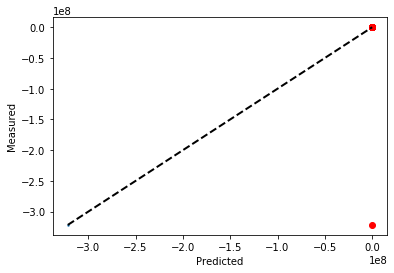

In [68]:
# 印出係數
# print(estimator.coef_)
# 印出截距
print(estimator.intercept_ )
plt.scatter(pred,pred,s=2)
plt.plot(pred, 'ro')
plt.plot([pred.min(), pred.max()], [pred.min(), pred.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Measured')

In [48]:
# 將輸出結果 pred 與前面留下的 ID(ids) 合併, 輸出成檔案
# 可以下載並點開 house_baseline.csv 查看結果, 以便了解預測結果的輸出格式
# 本範例所與作業所輸出的 csv 檔, 均可用於本題的 Kaggle 答案上傳, 可以試著上傳來熟悉 Kaggle 的介面操作
pred = np.expm1(pred)
sub = pd.DataFrame({'Id': ids, 'SalePrice': pred})
sub.to_csv('house_baseline.csv', index=False) 
sub.head()

,Id,SalePrice
0,1461,114020.251232
1,1462,157698.341782
2,1463,164552.511884
3,1464,193258.854262
4,1465,184999.742497
